# World Happiness Report Data Analysis

In this project I will briefly explore the happiness data, compiled on [kaggle](https://www.kaggle.com/unsdsn/world-happiness), and World Development Data from the World Bank, compiled on [kaggle](https://www.kaggle.com/worldbank/world-development-indicators/version/2) from 2015 to 2017. The first reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically. The second, provides annual economic indicators from countries around the world. I will analyize this data to answer the following questions:



### Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

### Which of the factors above contribute the most to the happiness score?
    
### What else can be seen from this data?


To accomplish this I will do the following:

1. Explore the Data
2. Clean the Data
3. Analyze the Data
4. Make Conclusions from my analysis



### 1. Explore the Data

In [1]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
first_5 = happiness2015.head()
print(first_5)
print(happiness2015.info())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [2]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

In [3]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

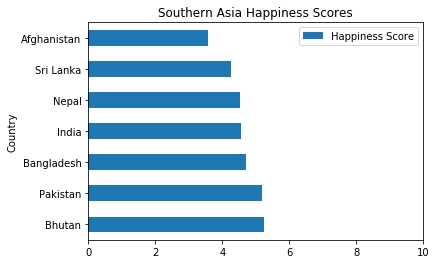

In [4]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

In [5]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean
    
print(happiness2015['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [6]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r]
    region_mean =region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean

In [7]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [8]:
happiness2015.groupby('Region')
print(happiness2015.groupby('Region'))

In [9]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [10]:
aus_nz = grouped.get_group('Australia and New Zealand')
print(aus_nz)

       Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646  


In [11]:
grouped.get_group('Australia and New Zealand')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [12]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [13]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [14]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group

print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


In [15]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [16]:
grouped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [17]:
grouped.min()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,Australia,9,7.284,0.03371,1.25018,1.30923,0.90837,0.63938,0.35637,0.43562,2.26425
Central and Eastern Europe,Albania,31,4.218,0.03135,0.39047,0.38562,0.53886,0.09245,0.00227,0.00199,0.89991
Eastern Asia,China,38,4.874,0.02424,0.82819,0.94675,0.60268,0.33208,0.02666,0.08185,0.65429
Latin America and Caribbean,Argentina,12,4.518,0.04076,0.26673,0.74302,0.38847,0.24425,0.01140,0.05841,1.21305
Middle East and Northern Africa,Algeria,11,3.006,0.03260,0.54649,0.47489,0.40064,0.00000,0.04582,0.06431,0.32858
North America,Canada,5,7.119,0.03553,1.32629,1.24711,0.86179,0.54604,0.15890,0.40105,2.45176
Southeastern Asia,Cambodia,24,3.819,0.02596,0.27108,0.62736,0.48246,0.44017,0.00000,0.16860,0.98195
Southern Asia,Afghanistan,79,3.575,0.02043,0.31982,0.30285,0.30335,0.12102,0.05907,0.21222,0.67108
Sub-Saharan Africa,Angola,71,2.839,0.03464,0.00000,0.00000,0.00000,0.10081,0.03060,0.06822,0.67042


In [18]:
grouped.max()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,New Zealand,10,7.286,0.04083,1.33358,1.31967,0.93156,0.65124,0.42922,0.47501,2.26646
Central and Eastern Europe,Uzbekistan,134,6.505,0.06913,1.18498,1.34043,0.87337,0.65821,0.38331,0.30030,3.10712
Eastern Asia,Taiwan,100,6.298,0.05051,1.38604,1.30060,1.01328,0.59608,0.37124,0.39478,2.32323
Latin America and Caribbean,Venezuela,119,7.226,0.13693,1.21183,1.30477,0.86027,0.63376,0.24558,0.46187,3.60214
Middle East and Northern Africa,Yemen,156,7.278,0.07832,1.69042,1.22393,0.91387,0.64157,0.52208,0.47179,3.08854
North America,United States,15,7.427,0.03839,1.39451,1.32261,0.90563,0.63297,0.32957,0.45811,2.51011
Southeastern Asia,Vietnam,145,6.798,0.06698,1.52186,1.26504,1.02525,0.66246,0.49210,0.79588,2.31945
Southern Asia,Sri Lanka,153,5.253,0.03751,0.83524,1.10395,0.70806,0.53726,0.15445,0.47998,3.10709
Sub-Saharan Africa,Zimbabwe,158,5.477,0.11068,1.06024,1.18468,0.70950,0.59201,0.55191,0.50318,3.05137


In [19]:
grouped.count()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,2,2,2,2,2,2,2,2,2,2,2
Central and Eastern Europe,29,29,29,29,29,29,29,29,29,29,29
Eastern Asia,6,6,6,6,6,6,6,6,6,6,6
Latin America and Caribbean,22,22,22,22,22,22,22,22,22,22,22
Middle East and Northern Africa,20,20,20,20,20,20,20,20,20,20,20
North America,2,2,2,2,2,2,2,2,2,2,2
Southeastern Asia,9,9,9,9,9,9,9,9,9,9,9
Southern Asia,7,7,7,7,7,7,7,7,7,7,7
Sub-Saharan Africa,40,40,40,40,40,40,40,40,40,40,40


In [20]:
grouped.sum()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,19,14.570,0.07454,2.58376,2.62890,1.83993,1.29062,0.78559,0.91063,4.53071
Central and Eastern Europe,2291,154.655,1.31102,27.33071,30.53823,20.84444,10.38979,2.51354,4.41565,58.62059
Eastern Asia,387,33.757,0.22335,6.91068,6.59656,5.26433,2.77494,0.76617,1.35531,10.08964
Latin America and Caribbean,1032,135.183,1.34479,19.28994,24.30385,15.48515,11.03827,2.57778,4.79133,57.69670
Middle East and Northern Africa,1552,108.138,0.92674,21.33947,18.40980,14.11231,7.23502,3.63404,3.80751,39.60017
North America,20,14.546,0.07392,2.72080,2.56972,1.76742,1.17901,0.48847,0.85916,4.96187
Southeastern Asia,731,47.857,0.38422,7.10149,8.46421,6.09621,5.01394,1.36148,3.77335,16.04718
Southern Asia,792,32.066,0.22513,3.92340,4.51725,3.78581,2.61336,0.71775,2.39000,14.11738
Sub-Saharan Africa,5116,168.112,2.21195,15.21892,32.36340,11.29327,14.63776,4.95511,8.84547,80.79920


In [21]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped["Happiness Score"]
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [22]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

print(happy_mean_max)
print(mean_max_dif)

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587
Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western E

In [23]:
happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.amax])

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [24]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [25]:
happiness2015.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [26]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


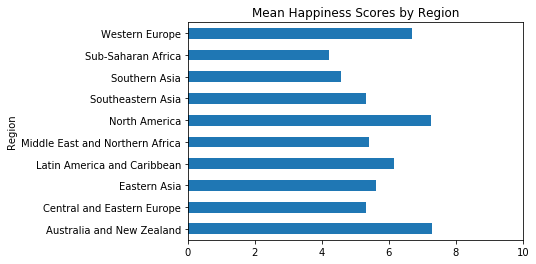

In [27]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

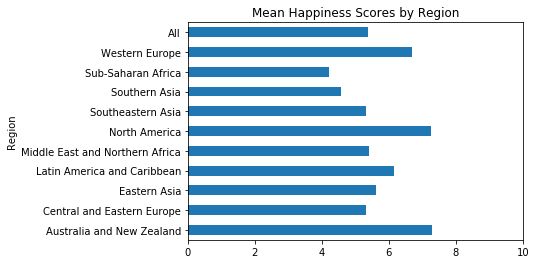

In [28]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
world_mean_happiness = happiness2015['Happiness Score'].mean()

In [29]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [30]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [31]:
happiness2015.groupby(['Region']).agg([np.min, np.max , np.mean])
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
print(happy_family_stats)
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max , np.mean], margins=True)

                                Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

In [32]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

print(happiness2015.head())
print(happiness2016.head())
print(happiness2017.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [33]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis1 = pd.concat([head_2015, head_2016], axis =1)

print(concat_axis0)
print(concat_axis1)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016
       Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016


In [34]:
print(concat_axis0.count('index'))
print(concat_axis1.count('index'))

Country            6
Happiness Score    6
Year               6
dtype: int64
Country            3
Happiness Score    3
Year               3
Country            3
Happiness Score    3
Year               3
dtype: int64


In [35]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

pd.concat([head_2015, head_2016], sort=True)

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


In [36]:
pd.concat([head_2015, head_2016], axis=1)

,Year,Country,Happiness Score,Standard Error,Country,Happiness Score,Year
0,2015,Switzerland,7.587,0.03411,Denmark,7.526,2016.0
1,2015,Iceland,7.561,0.04884,Switzerland,7.509,2016.0
2,2015,Denmark,7.527,0.03328,Iceland,7.501,2016.0
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


In [37]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

pd.concat([head_2015, head_2016], axis=0, ignore_index=True, sort=True)

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


In [38]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
pd.merge(left=three_2015, right=three_2016, on='Country')

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [39]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')

print(merged)
print(merged_left)
print(merged_left_updated)

  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


In [40]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')

merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=('_2016', '_2015'))

print(merged_suffixes)
print(merged_updated_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN
   Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


In [41]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))

rows = 4
columns = 6

pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, how='left', suffixes = ('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


/Users/claudiaflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


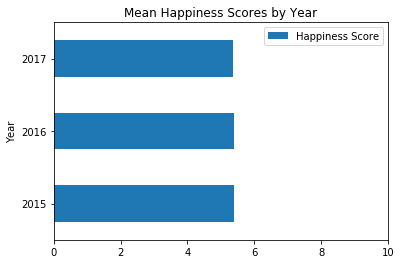

In [42]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017])
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

In [43]:
happiness2015.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust'}, inplace=True)

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_map = happiness2015['Economy'].map(label)
happiness2015['Economy'].map(label)

0      High
1      High
2      High
3      High
4      High
5      High
6      High
7      High
8      High
9      High
10     High
11      Low
12     High
13     High
14     High
15      Low
16     High
17     High
18     High
19     High
20     High
21     High
22     High
23     High
24     High
25     High
26     High
27     High
28     High
29     High
       ... 
128     Low
129     Low
130     Low
131     Low
132     Low
133    High
134     Low
135     Low
136     Low
137     Low
138     Low
139     Low
140     Low
141     Low
142    High
143     Low
144     Low
145     Low
146     Low
147     Low
148     Low
149     Low
150     Low
151     Low
152     Low
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [44]:
economy_impact_apply = happiness2015['Economy'].apply(label)
happiness2015['Economy'].apply(label)

0      High
1      High
2      High
3      High
4      High
5      High
6      High
7      High
8      High
9      High
10     High
11      Low
12     High
13     High
14     High
15      Low
16     High
17     High
18     High
19     High
20     High
21     High
22     High
23     High
24     High
25     High
26     High
27     High
28     High
29     High
       ... 
128     Low
129     Low
130     Low
131     Low
132     Low
133    High
134     Low
135     Low
136     Low
137     Low
138     Low
139     Low
140     Low
141     Low
142    High
143     Low
144     Low
145     Low
146     Low
147     Low
148     Low
149     Low
150     Low
151     Low
152     Low
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [45]:
economy_impact_map.equals(economy_impact_apply)

True

In [46]:
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,High


In [47]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
    
happiness2015['Economy'].apply(label, x = .8)

0      High
1      High
2      High
3      High
4      High
5      High
6      High
7      High
8      High
9      High
10     High
11     High
12     High
13     High
14     High
15     High
16     High
17     High
18     High
19     High
20     High
21     High
22     High
23     High
24     High
25     High
26     High
27     High
28     High
29     High
       ... 
128     Low
129     Low
130     Low
131    High
132     Low
133    High
134    High
135     Low
136     Low
137     Low
138     Low
139     Low
140     Low
141     Low
142    High
143     Low
144     Low
145     Low
146     Low
147     Low
148     Low
149     Low
150     Low
151     Low
152     Low
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [48]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

happiness2015[factors].applymap(label)

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
5,High,High,Low,Low,Low,Low
6,High,High,Low,Low,Low,Low
7,High,High,Low,Low,Low,Low
8,High,High,Low,Low,Low,Low
9,High,High,Low,Low,Low,Low


In [49]:
factors_impact = happiness2015[factors].applymap(label)

def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

factors_impact.apply(v_counts)   

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [50]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div * 100

happiness2015[factors].apply(percentages)

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
5,17.421685,17.799892,12.005266,8.664461,5.586281,3.152984,35.370645
6,18.018975,17.351179,12.101382,8.345893,4.312009,6.452968,33.419626
7,18.084058,17.505024,12.369229,8.959804,5.953829,4.924226,32.199756
8,17.158660,18.112407,12.467335,8.775460,5.891024,6.519489,31.076722
9,18.308347,17.974053,12.789127,8.940692,4.892504,5.980505,31.115596


In [51]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)
pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629
5,Finland,Western Europe,6,7.406,Economy,1.29025
6,Netherlands,Western Europe,7,7.378,Economy,1.32944
7,Sweden,Western Europe,8,7.364,Economy,1.33171
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358


In [52]:
round(melt['value']/melt['Happiness Score'] * 100, 2)

0       18.41
1       17.22
2       17.61
3       19.40
4       17.86
5       17.42
6       18.02
7       18.08
8       17.16
9       18.31
10      16.88
11      13.23
12      18.57
13      14.20
14      19.59
15      14.05
16      22.52
17      19.25
18      18.85
19      20.68
20      18.44
21      19.85
22      15.33
23      22.39
24      15.67
25      19.67
26      16.60
27      25.57
28      19.43
29      16.03
        ...  
1076    32.92
1077    37.13
1078    65.42
1079    15.71
1080    45.88
1081    21.33
1082    38.13
1083    47.17
1084    48.34
1085    44.88
1086    42.15
1087    49.50
1088    36.32
1089    36.99
1090    25.64
1091    48.86
1092    25.71
1093    36.52
1094    50.29
1095    74.02
1096    52.99
1097    54.48
1098    38.78
1099    40.84
1100    54.60
1101    19.35
1102    48.90
1103    10.93
1104    63.10
1105    55.20
Length: 1106, dtype: float64

In [53]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2010.0,2013.0,2005.0
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2010.0,2013.0,2008.0
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,Consolidated central government,NaN,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0


In [54]:
def extract_last_word(element):
    element = str(element)
    element = element.split()
    return element[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [55]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [56]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)
lengths = merged['CurrencyUnit'].str.len()
merged['CurrencyUnit'].str.len()

0      11.0
1      13.0
2      12.0
3      15.0
4      15.0
5       4.0
6       4.0
7      13.0
8      18.0
9      17.0
10     18.0
11     17.0
12      4.0
13     12.0
14     11.0
15     14.0
16      4.0
17      4.0
18      4.0
19     13.0
20     14.0
21     10.0
22     25.0
23     16.0
24     17.0
25      4.0
26     12.0
27     12.0
28      4.0
29     14.0
       ... 
128    12.0
129    13.0
130    13.0
131    16.0
132    25.0
133    13.0
134    14.0
135    11.0
136    14.0
137    22.0
138     NaN
139    14.0
140    16.0
141    22.0
142    25.0
143    22.0
144    14.0
145    18.0
146    15.0
147    25.0
148    25.0
149    13.0
150     NaN
151    22.0
152    14.0
153    13.0
154    22.0
155     NaN
156    13.0
157    22.0
Name: CurrencyUnit, Length: 158, dtype: float64

In [57]:
lengths.value_counts(dropna=False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [58]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [59]:
national_accounts.value_counts(dropna=False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [60]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [61]:
pattern =r"()"
pattern =r"([1-2][0-9]{3})"

merged['SpecialNotes'].str.extract(pattern)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


In [62]:
pattern = r"([1-2][0-9]{3})"

merged['SpecialNotes'].str.extract(pattern, expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


In [63]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
merged['IESurvey'].value_counts()

Integrated household survey (IHS), 2012                                                       21
Integrated household survey (IHS), 2010                                                       10
Integrated household survey (IHS), 2013                                                        8
Integrated household survey (IHS), 2011                                                        8
Expenditure survey/budget survey (ES/BS), 2012                                                 7
Expenditure survey/budget survey (ES/BS), 2010                                                 4
Expenditure survey/budget survey (ES/BS), 2013                                                 4
Integrated household survey (IHS), 2008                                                        3
Expenditure survey/budget survey (ES/BS), 2005                                                 3
Income survey (IS), 2010                                                                       3
Integrated household survey (I

In [64]:
merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()

0         HIGH OECD
1         HIGH OECD
2         HIGH OECD
3         HIGH OECD
4         HIGH OECD
5         HIGH OECD
6         HIGH OECD
7         HIGH OECD
8         HIGH OECD
9         HIGH OECD
10        HIGH OECD
11     UPPER MIDDLE
12        HIGH OECD
13     UPPER MIDDLE
14        HIGH OECD
15     UPPER MIDDLE
16        HIGH OECD
17        HIGH OECD
18        HIGH OECD
19     HIGH NONOECD
20        HIGH OECD
21     HIGH NONOECD
22     HIGH NONOECD
23     HIGH NONOECD
24     UPPER MIDDLE
25        HIGH OECD
26        HIGH OECD
27     HIGH NONOECD
28        HIGH OECD
29     HIGH NONOECD
           ...     
128    LOWER MIDDLE
129    LOWER MIDDLE
130             LOW
131    LOWER MIDDLE
132    LOWER MIDDLE
133    UPPER MIDDLE
134    LOWER MIDDLE
135    LOWER MIDDLE
136    UPPER MIDDLE
137             LOW
138             NaN
139             LOW
140             LOW
141    LOWER MIDDLE
142    UPPER MIDDLE
143             LOW
144             LOW
145             LOW
146             LOW


In [65]:
pv_incomes = merged.pivot_table(index='IncomeGroup', values='Happiness Score')
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


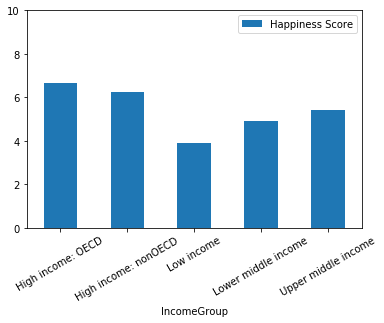

In [66]:
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))

In [67]:
happiness2015.shape

(158, 14)

In [68]:
happiness2016.shape

(157, 14)

In [69]:
happiness2017.shape

(155, 13)

In [70]:
#moto = pd.read_csv("world_happiness_2015.csv", na_values=['NaN'])

In [71]:
#moto = pd.read_csv('world_happiness_2015.csv')

In [72]:
#moto['Happiness Score'] = pd.to_numeric(moto['Happiness Score'], errors='coerce')

In [73]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact


In [74]:
happiness2015.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
Year                 0
Economy Impact       0
dtype: int64

In [75]:
#moto = moto.convert_objects(convert_numeric=True)

In [76]:
#missing = moto['Happiness Score'].isnull()
#moto[missing]

In [77]:
happiness2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [78]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
Year                             0
dtype: int64

In [79]:
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

In [80]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [81]:
happiness2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [82]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [83]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('.', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('.', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('\s+', ' ').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)
pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR
0,Switzerland,2.517380,1.396510,1.349510,0.665570,0.296780,1.0,7.587,0.941430,NaN,Western Europe,0.03411,0.419780,NaN,NaN,NaN,2015
1,Iceland,2.702010,1.302320,1.402230,0.628770,0.436300,2.0,7.561,0.947840,NaN,Western Europe,0.04884,0.141450,NaN,NaN,NaN,2015
2,Denmark,2.492040,1.325480,1.360580,0.649380,0.341390,3.0,7.527,0.874640,NaN,Western Europe,0.03328,0.483570,NaN,NaN,NaN,2015
3,Norway,2.465310,1.459000,1.330950,0.669730,0.346990,4.0,7.522,0.885210,NaN,Western Europe,0.03880,0.365030,NaN,NaN,NaN,2015
4,Canada,2.451760,1.326290,1.322610,0.632970,0.458110,5.0,7.427,0.905630,NaN,North America,0.03553,0.329570,NaN,NaN,NaN,2015
5,Finland,2.619550,1.290250,1.318260,0.641690,0.233510,6.0,7.406,0.889110,NaN,Western Europe,0.03140,0.413720,NaN,NaN,NaN,2015
6,Netherlands,2.465700,1.329440,1.280170,0.615760,0.476100,7.0,7.378,0.892840,NaN,Western Europe,0.02799,0.318140,NaN,NaN,NaN,2015
7,Sweden,2.371190,1.331710,1.289070,0.659800,0.362620,8.0,7.364,0.910870,NaN,Western Europe,0.03157,0.438440,NaN,NaN,NaN,2015
8,New Zealand,2.264250,1.250180,1.319670,0.639380,0.475010,9.0,7.286,0.908370,NaN,Australia and New Zealand,0.03371,0.429220,NaN,NaN,NaN,2015
9,Australia,2.266460,1.333580,1.309230,0.651240,0.435620,10.0,7.284,0.931560,NaN,Australia and New Zealand,0.04083,0.356370,NaN,NaN,NaN,2015


In [84]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

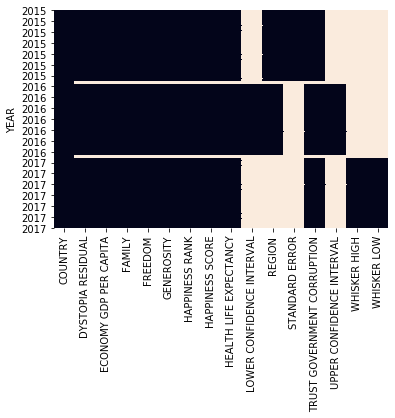

In [85]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)

In [86]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
regions_2017.isnull().sum()

164

In [87]:
#combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
#combined = combined.drop('REGION_x', axis=1)
#missing = combined.isnull().sum()
#combined.isnull().sum()